# Self-Tuning Spectral Clustering
L. Zelnik-Manor and P. Perona
NIPS 2004

http://www.vision.caltech.edu/lihi/Demos/SelfTuningClustering.html

We implement a Local Scale.

In [16]:
%pylab inline --no-import-all
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt
from numpy import linalg as LA
from tqdm import tqdm


def matrix_plot(A, title):
    column, row = data.shape
    path = "."
    plt.imshow(A,interpolation='nearest')
    plt.style.use(style='fivethirtyeight')
    plt.title(title, fontsize=30)
    plt.show()

    
def normalized(data):
    """
    change feature span 0-1
    :param data: pure data
    :return: normalized data
    """
    data_max = data.max()
    column, rows = data.shape
    for i in range(column):
        data[i] = data[i]/data_max
    return data


def localscaling(data, normalize):
    """
    Use Local Scaling by Self turning spectral clustering
    I strong reccomend non normalize localscale
    :param graph: data matrix
    :return: local scale
    """
    column, row = data.shape
    dim = column
    K =7

    dist = np.zeros([dim,dim])
    for i in tqdm(range(dim)):
        for j in range(dim):
            dist[i, j] = LA.norm(data[i] - data[j])
    sigma = np.sort(dist)[:,(K-1)]
    if normalize:
        dist_max = np.max(dist)
        normalizedsigma = sigma/dist_max
        return(normalizedsigma)

    else:
        return(sigma)


def data2graph(data, localscale):
    """
    data convert to affinity graph
    Image data has a space feature
    In some paper, Gaussian Kernel is exp(-d(i,j)^2/sigma^2).
    But I recommend exp(-d(i,j)^2/2sigma^2) (Genaliaze gaussian kernel)
    non Image data hasn't space feature
    :param data: Full connect graph
    """

    column, row = data.shape
    dim = column
    graph = np.zeros([dim, dim])
    print('Graph Size : {}'.format(graph.shape))
    if localscale:
        sigma = localscaling(data, normalize=False)
        for i in tqdm(range(dim)):
            for j in range(dim):
                graph[i, j] = np.exp(-LA.norm(data[i] - data[j])**2/(2*sigma[i]*sigma[j]))
        title = 'localscaledim_{}'.format(dim)
        matrix_plot(graph,title)
    else:
        sigma = 0.5
        for i in tqdm(range(dim)):
            for j in range(dim):
                graph[i, j] = np.exp(-LA.norm(data[i] - data[j])**2/2*sigma**2)
        title = r'$\sigma$_{}'.format(sigma)+'dim_{}'.format(dim)
        matrix_plot(graph,title)

Populating the interactive namespace from numpy and matplotlib


## Change variance in Gaussian Kernel
In Graph constructing field, commonlly used gaussian kernel, that is criteria between data $a_i$ and $a_j$.
Bad finding good $sigma$ is difficult.

### We show experiment.

- Empirical.
    - Graph use a scipy hand-written digit data. $8 \times 8$ pixel, and each pixel has a 16 dimention feature value.
    - First we use a $sigma=0.5$, that is empirically good value.

Graph Size : (1797, 1797)


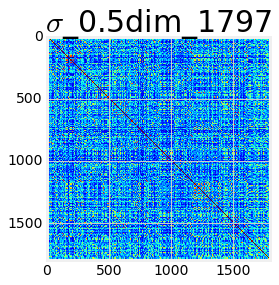

In [17]:
digits = ds.load_digits()
data = digits.data
normalized(data)
data2graph(data, localscale=False)

- localscale
    - This criteria is proposed by self-turing spectral clustering, that is easy and simple mehod.
    - http://www.vision.caltech.edu/lihi/Demos/SelfTuningClustering.html

Graph Size : (1797, 1797)


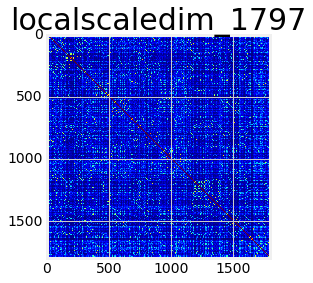

In [11]:
digits = ds.load_digits()
data = digits.data
normalized(data)
data2graph(data, localscale=True)